In [1]:
#! /usr/bin/python3

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

#  Reading in log file
df = pd.read_csv('Logs/Log00020.csv', delimiter=',') 

# Removing battery level, roll, pitch, K&Z Temp, and NA row that was added as a buffer.
t_fract = df['Time [UTC]']
t_fract = (t_fract.str[11:13])
t_fract = t_fract.astype(int)

# Dropping exta info
df = df.iloc[: ,3:]
df = df.drop(columns=[" Bat [V]", " R_u [deg]", " P_u [deg]", " Temp RTC [C]"])
df = df.iloc[: ,:-2]

cols = [' UVA_u', ' UVB_u', ' White_u', ' Vis_u [lx]', ' IR_S_u',
       ' IR_M_u']
       
y = df[[' Pyro [uV]']]
X = df.drop(columns=[' Pyro [uV]', " TempOB [C]"])


C:\Users\Tyler\AppData\Local\Temp\ipykernel_3780\355581638.py:14: DtypeWarning: Columns (3,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Logs/Log00020.csv', delimiter=',')


In [2]:
# Verify Correct data
X.head()
print(X.shape)
X.dropna(axis=0)
print(X.shape)

print(y.head())

X = np.array(X, dtype=float)
y = np.array(y, dtype=float)

(113570, 6)
(113570, 6)
    Pyro [uV]
0     8546.88
1     8687.50
2     8796.88
3     8781.25
4     8718.75


In [3]:
# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [4]:
# Create Decision Tree classifer object
clf = DecisionTreeRegressor()

# Train Decision Tree Classifer
clf = clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [5]:
print(clf.score(X_test, y_test))

0.9951864410453618


dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.0504223 to fit



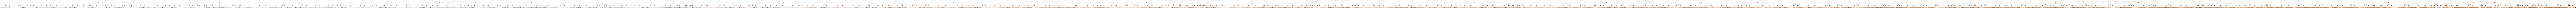

In [6]:
# Visualization

from sklearn.tree import export_graphviz
from io import StringIO
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True, feature_names=cols,class_names='Pyro [UV]',
                special_characters=True,max_depth=12)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_pdf('pyrotree.pdf')
Image(graph.create_png())